# Plotting histograms from the "Z path" analysis

## Initial set-up

These commands give us access to some tools for plotting histograms and other graphs. We only need to run these once at the beginning of the notebook.

In [1]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = 8,6

## Plotting the invariant masses as a histogram

This command opens the file. You may have to edit it to reflect the actual name of the file containing your results:

In [2]:
data_file = open('Invariant_Masses.txt')

Then we can read the data from the file and store it in a list in the memory of the computer. If we want to rerun this cell we will also have to rerun the command above to open the file again.

In [3]:
masses = []                      # Create an empty list for masses from e+e- channel
for line in data_file:           # Loop over each line in the file
    mass, channel = line.split() # Each line contains a mass (in GeV) and a "channel" (m for mu+mu-, etc.)
    m = float(mass)              # The mass is read in as a string, so we convert it to a (floating point) number ...
    masses.append(m)             # ... before adding it to the list.

Print the list of masses, just to make sure it looks sensible:

In [4]:
print(masses)

[89.9733981315751, 90.41048492701736, 76.67546671456157, 87.72613138615718, 92.66747672218501, 913.2853408638404, 112.25390180359038, 93.33095345994056, 98.29383548455246, 116.27712054878462]


Then we can create a histogram of the masses and display it.

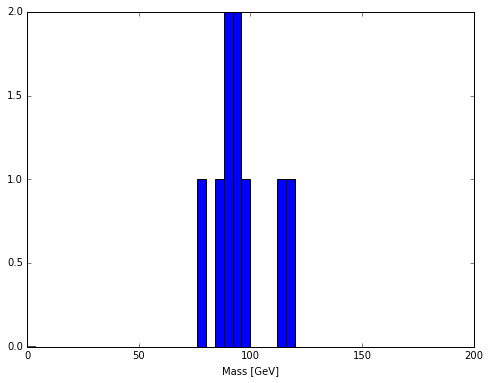

In [5]:
plt.hist(masses, bins=50, range=(0,200))
plt.xlabel('Mass [GeV]')

To present our data better, there are various tricks we can try. See [Basic Data Plotting with Matplotlib Part 3: Histograms](https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/) for some possibilities, or the [Pyplot tutorial](http://www.matplotlib.org/users/pyplot_tutorial.html) for many more possibilities and examples.

## Plotting the channels separately

This histogram above includes all the invariant masses in the data file, without showing which come from $e^+e^-$ events, which from $\mu^+\mu^-$ events, and so on. We might want to display the channels separately, which means keeping a list of data for each channel. Initially let's just plot the $e^+e^-$ and $\mu^+\mu^-$ events, and then lump everything else together as "miscellaneous".

In [6]:
data_file = open('Invariant_Masses.txt')  # We need to open the file again

masses_e = []                      # Create an empty list for masses from e+e- channel
masses_m = []                      # Create an empty list for masses from mu+mu- channel
masses_misc = []                   # Create an empty list for masses from all other channels

for line in data_file:           # Loop over each line in the file
    mass, channel = line.split() # Each line contains a mass (in GeV) and a "channel" (m for mu+mu-, etc.)
    m = float(mass)
    if channel=='e':
        masses_e.append(m)
    elif channel=='m':
        masses_m.append(m)
    else:
        masses_misc.append(m)

We can plot all these histograms on the same axes, using different colours.

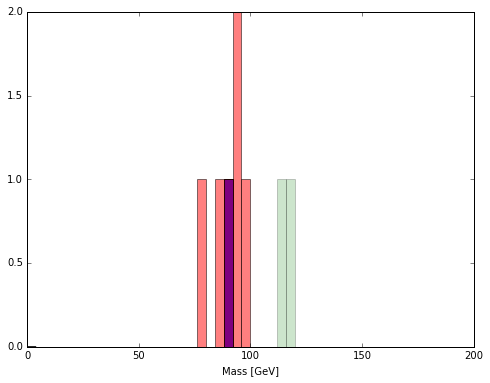

In [7]:
plt.hist(masses_e, bins=50, range=(0,200), color='b')
plt.hist(masses_m, bins=50, range=(0,200), color='r', alpha=0.5)
plt.hist(masses_misc, bins=50, range=(0,200), color='g', alpha=0.2)
plt.xlabel('Mass [GeV]')

To present our data better, there are various tricks we can try. See [Basic Data Plotting with Matplotlib Part 3: Histograms](https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/) for some possibilities.

## Reading the channels from the input file

If there are many different channels in the data, it can be tedious and error-prone to write a separate "elif" clause for each one. In other cases we might not even know what channels are in the data file. So we may want to take this information from the data file itself.

We can do this using a Python container object called a *dictionary*. In this dictionary we will store a *list* of data for each channel, such that we can easily find the list of data corresponding to a given channel.

In [8]:
data_file = open('Invariant_Masses.txt')  # We need to open the file again

channels = {}                             # Create an empty "dictionary"
for line in data_file:                    # Reading in the data from each line ...
    mass, channel = line.split()          #
    m = float(mass)                       # ... works the same as before.
    if channel in channels:               # If this channel is already in our dictionary ...
        channel_data = channels[channel]  # ... we find the existing list of data for this channel.
    else:                                 # If this channel is *not* already in the dictionary ...
        channel_data = []                 # ... we create a new, empty list for this channel ...
        channels[channel] = channel_data  # ... and add it to the dictionary.
    channel_data.append(m)                # Either way, we add the invariant mass to the list for this channel.

So all the data is now in the dictionary called `channels`. What does this look like?

In [9]:
print(channels)

{'g': [112.25390180359038, 116.27712054878462], 'm': [90.41048492701736, 76.67546671456157, 87.72613138615718, 92.66747672218501, 913.2853408638404, 93.33095345994056, 98.29383548455246], 'e': [89.9733981315751]}


For each channel in the input data file, we can see the corresponding channel name (e.g. `e`) followed by a colon (`:`) and a list containing the invariant masses for that channel. If we want to look at just one of these lists, we can extract it from the dictionary using the channel name as a *key*:

In [10]:
print(channels['g'])

[112.25390180359038, 116.27712054878462]


Let's use a loop over all the channels, creating a separate histogram for each one:

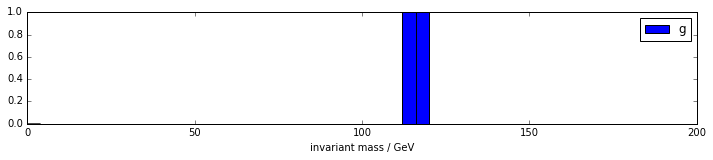

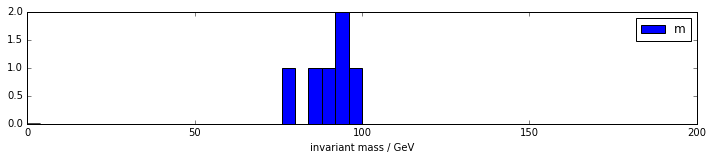

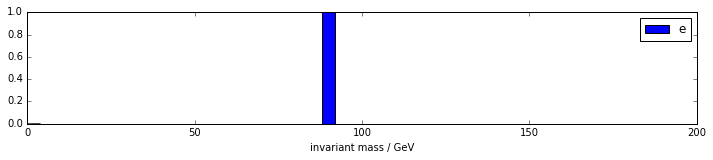

In [11]:
pylab.rcParams['figure.figsize'] = 12,2
plot_number = 0
for channel in channels:
    plot_number += 1
    plt.figure(plot_number)
    masses = channels[channel]
    plt.hist(masses, bins=50, range=(0,200), label=channel)
    plt.legend()
    plt.xlabel('invariant mass / GeV')